### Imports

In [4]:
import os
from PIL import Image
from utils import Classification, Puzzle, Segmentation
import matplotlib as plt

In [5]:
classifier = Classification()
puzzle = Puzzle()
segmenter = Segmentation()

# Segmentation

In [6]:
n_train = 1
pieces, mask = segmenter.squares_from_image(n_train)

/home/matej/Projects/iapr_project/utils.py:39: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  remove_laplace = remove_small_holes(closed_laplace, holes_size).astype('float')


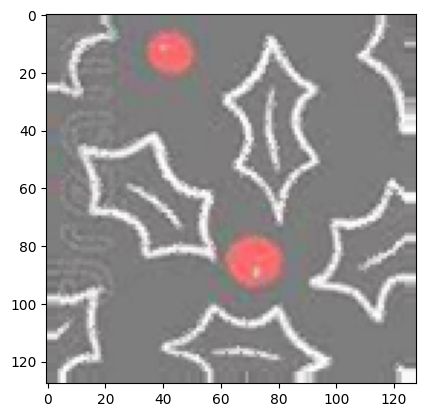

In [8]:
plt.pyplot.imshow(pieces[0])

# Features extraction and classification

In [7]:
final_combinations, dist = classifier.classify(pieces)

/home/matej/Projects/iapr_project/utils.py:493: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features_vector[idx_feature+4] = skew(fimg.flatten())
/home/matej/Projects/iapr_project/utils.py:494: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features_vector[idx_feature+5] = skew(fimgr.flatten())
/home/matej/Projects/iapr_project/utils.py:495: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features_vector[idx_feature+6] = skew(fimgg.flatten())
/home/matej/Projects/iapr_project/utils.py:496: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Save the classified data

In [ ]:
# path
parent_dir = os.getcwd()

directory = "output_train_{}".format(str(n_train).zfill(2))
path = os.path.join(parent_dir, directory)

try:
    os.mkdir(path)
except OSError as error:
    print(error) 
    
n_outlier = 0
n_puzzle = 0

for i in range(len(final_combinations)):
    
    print(len(final_combinations[i]))
    if (len(final_combinations[i]) == 9 or len(final_combinations[i]) == 12 or len(final_combinations[i]) == 16):
        print("The culstering seems correct for puzzle n°", n_puzzle)
    else:
        print("Careful! The puzzle n°{} contains one or more outliers!".format(str(n_puzzle)))     
            
    for j in range(len(final_combinations[i])):
        if len(final_combinations[i]) < 4:
            filename =os.path.join(path, "outlier_{}_{}.png".format(str(n_train).zfill(2), str(n_outlier).zfill(2)))
            Image.fromarray(pieces[final_combinations[i][j]]).save(filename)
            n_outlier += 1
        else:
            filename =os.path.join(path, "solution_{}_{}_{}.png".format(str(n_train).zfill(2), str(n_puzzle).zfill(2), str(j).zfill(2)))
            Image.fromarray(pieces[final_combinations[i][j]]).save(filename)
            
        if j == (len(final_combinations[i]) - 1):
            n_puzzle += 1
    

[WinError 183] Impossible de créer un fichier déjà existant: 'C:\\Users\\nalbe\\iapr\\project\\output_train_09'
9
The culstering seems correct for puzzle n° 0
9
The culstering seems correct for puzzle n° 1
11
Careful! The puzzle n°2 contains one or more outliers!


## Group the pieces together to complete the puzzle

In [ ]:
#subpart_images = [...]

#groupes_pieces = puzzle.group_images(subpart_images)
#big_image.save('big_image.jpg')